**HATE SPEECH DETECTION**

Imporing packages


In [60]:
# Importing the pandas library for data manipulation and analysis
import pandas as pd

# Importing the seaborn library for statistical data visualization
import seaborn as sns

# Importing the pyplot module from matplotlib for creating visualizations
import matplotlib.pyplot as plt

Train model testing

In [61]:
# Load the training dataset from 'train.csv' into a pandas DataFrame
train = pd.read_csv('train.csv')
# Print the structure and size of the training dataset
print(f"Training Set Columns: {train.columns}, Shape: {train.shape}, Length: {len(train)}")

Training Set Columns: Index(['id', 'label', 'tweet'], dtype='object'), Shape: (31962, 3), Length: 31962


Text module testing

In [62]:
# Load the testing dataset from 'test.csv' into a pandas DataFrame
test = pd.read_csv('test.csv')
# Print the structure and size of the testing dataset
print(f"Test Set Columns: {test.columns}, Shape: {test.shape}, Length: {len(test)}")

Test Set Columns: Index(['id', 'tweet'], dtype='object'), Shape: (17197, 2), Length: 17197


  Test Testing

In [64]:
# Display the content of the testing dataset
test

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."
...,...,...
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."


Data Cleaning

In [65]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure required NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')  # For WordNet Lemmatizer

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def clean_text(df, text_field):
    # Convert to lowercase
    df[text_field] = df[text_field].str.lower()

    # Remove mentions, special characters, URLs, and extra text
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))

    # Remove stopwords and apply lemmatization
    df[text_field] = df[text_field].apply(
        lambda elem: " ".join(
            [lemmatizer.lemmatize(word) for word in elem.split() if word not in stop_words]
        )
    )

    return df

# Apply the updated cleaning function
test_clean = clean_text(test, "tweet")
train_clean = clean_text(train, "tweet")

# Display cleaned test dataset
print("Cleaned Test Data:")
print(test_clean.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Cleaned Test Data:
      id                                              tweet
0  31963  studiolife aislife requires passion dedication...
1  31964  white supremacist want everyone see new bird m...
2  31965   safe way heal acne altwaystoheal healthy healing
3  31966  hp cursed child book reservation already yes h...
4  31967  3rd bihday amazing hilarious nephew eli ahmir ...


In [66]:
# Display the content of the testing dataset
test_clean

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacist want everyone see new bird m...
2,31965,safe way heal acne altwaystoheal healthy healing
3,31966,hp cursed child book reservation already yes h...
4,31967,3rd bihday amazing hilarious nephew eli ahmir ...
...,...,...
17192,49155,thought factory leftright polarisation trump u...
17193,49156,feeling like mermaid hairflip neverready forma...
17194,49157,hillary campaigned today ohioomg amp used word...
17195,49158,happy work conference right mindset lead cultu...


Occurence of Imbalanced data

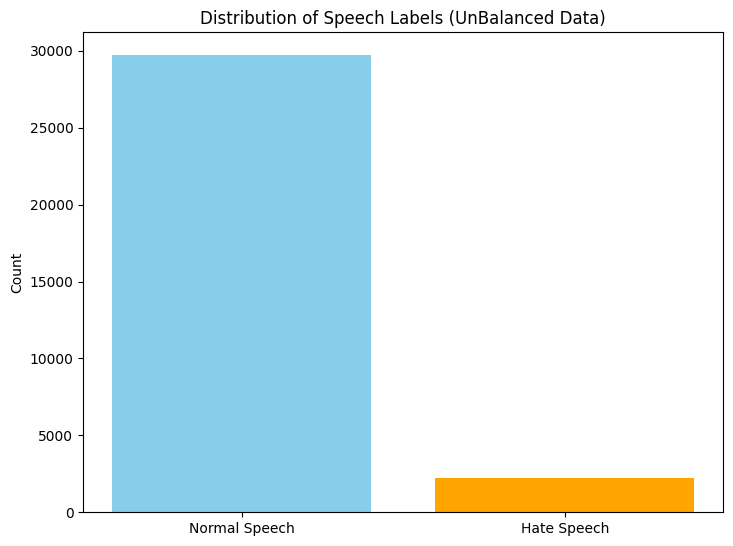

In [67]:
# Create a new figure for plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Define categories for the x-axis
langs = ['Normal Speech','Hate Speech']

# Calculate the counts for each label (0: Normal Speech, 1: Hate Speech)
data = [len(train_clean[train_clean.label==0]),len(train_clean[train_clean.label==1])]

# Create a bar chart with labels on the x-axis and corresponding counts on the y-axis
ax.bar(langs, data, color=['skyblue', 'orange'])
ax.set_title('Distribution of Speech Labels (UnBalanced Data)')
ax.set_ylabel('Count')
plt.show()

Occurence of Balanced Data

In [68]:
from sklearn.utils import resample

# Separate the majority class (label == 0) and minority class (label == 1) from the training dataset
train_majority = train_clean[train_clean.label==0]
train_minority = train_clean[train_clean.label==1]

# Upsample the minority class to match the size of the majority class
train_minority_upsampled = resample(train_minority,
                                 replace=True,
                                 n_samples=len(train_majority),
                                 random_state=123)

# Combine the upsampled minority class with the majority class to create a balanced dataset
train_upsampled = pd.concat([train_minority_upsampled, train_majority])
train_upsampled['label'].value_counts()

,count
label,
1,29720
0,29720


Balanced Data

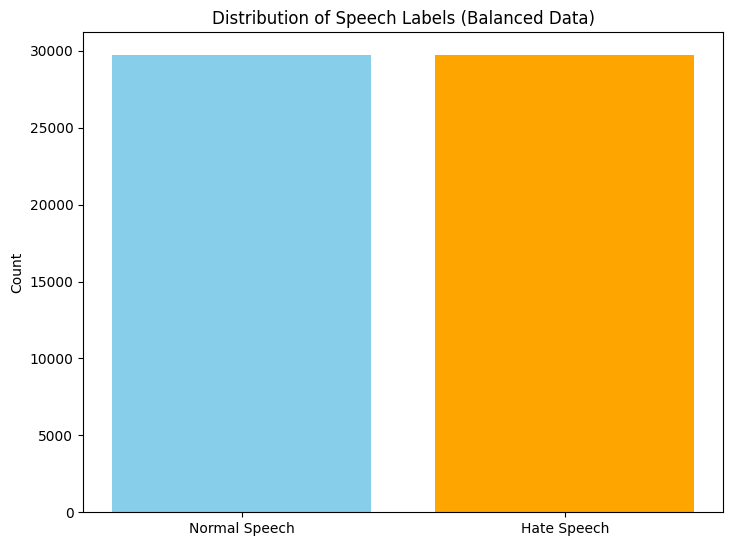

In [69]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Normal Speech','Hate Speech']

# Calculate the counts for each label (0: Normal Speech, 1: Hate Speech) in the upsampled dataset
data = [len(train_upsampled[train_upsampled.label==0]),len(train_upsampled[train_upsampled.label==1])]
ax.bar(langs, data, color=['skyblue', 'orange'])

# Set the title of the bar chart to indicate it represents balanced data
ax.set_title('Distribution of Speech Labels (Balanced Data)')
ax.set_ylabel('Count')
plt.show()

Pipeline

In [70]:
# Import necessary modules for building the text classification pipeline
from sklearn.feature_extraction.text import TfidfVectorizer  # For converting text data into TF-IDF features
from sklearn.pipeline import Pipeline  # For creating a streamlined workflow of data preprocessing and modeling
from sklearn.feature_extraction.text import CountVectorizer  # For tokenizing and counting word occurrences
from sklearn.feature_extraction.text import TfidfTransformer  # For computing Term Frequency-Inverse Document Frequency (TF-IDF)
from sklearn.linear_model import SGDClassifier  # Stochastic Gradient Descent classifier for text classification

# Create a pipeline for text classification using Stochastic Gradient Descent
pipeline_sgd = Pipeline([
    ('vect', CountVectorizer()),  # Step 1: Convert raw text into a matrix of token counts
    ('tfidf', TfidfTransformer()),  # Step 2: Transform the count matrix into a normalized TF-IDF representation
    ('nb', SGDClassifier()),  # Step 3: Use a Stochastic Gradient Descent classifier for training and prediction
])

In [71]:
from sklearn.model_selection import train_test_split

# Split the balanced dataset into training and testing subsets
# Features (X): 'tweet' column from the upsampled dataset (text data)
# Target (y): 'label' column from the upsampled dataset (speech labels)
X_train, X_test, y_train, y_test = train_test_split(train_upsampled['tweet'],
                                                    train_upsampled['label'],random_state = 0)

In [75]:
# Train the model using the pipeline

model = pipeline_sgd.fit(X_train, y_train)
y_predict = model.predict(X_test)

# Import the f1_score function to evaluate the model's performance
from sklearn.metrics import f1_score

# Compute the F1 score to measure the model's precision-recall balance
f1_score(y_test, y_predict)

0.9705251875669882

Evaluate the model


In [76]:
# Import necessary modules
from sklearn.linear_model import LogisticRegression  # For Logistic Regression (if needed later)
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.metrics import classification_report, accuracy_score, f1_score  # For evaluating model performance

# Calculate and display the accuracy of the model
# Accuracy measures the proportion of correctly classified instances among all instances
print("Accuracy:", accuracy_score(y_test, y_predict))

# Calculate and display the F1 score of the model
# F1 score is the harmonic mean of precision and recall, useful for evaluating imbalanced datasets
print("F1 Score:", f1_score(y_test, y_predict))

# Generate and display a classification report
# The report includes precision, recall, F1 score, and support for each class
print("\nClassification Report:\n", classification_report(y_test, y_predict))

Accuracy: 0.9703903095558546
F1 Score: 0.9705251875669882

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.96      0.97      7490
           1       0.96      0.98      0.97      7370

    accuracy                           0.97     14860
   macro avg       0.97      0.97      0.97     14860
weighted avg       0.97      0.97      0.97     14860



In [77]:
from sklearn.metrics import classification_report
import joblib

# Load the dataset
data = pd.read_csv("train.csv")  # Ensure this is the correct file
print(data.head())  # Inspect the dataset to verify structure

# Ensure the dataset has the required columns
if 'tweet' in data.columns and 'label' in data.columns:
    # Preprocess the text data
    def clean_text(text):
        # Remove user mentions, URLs, and special characters but keep hashtags
        text = re.sub(r"(@[A-Za-z0-9]+)|(\w+:\/\/\S+)|[^a-zA-Z0-9#\s]", "", text)
        return text.lower()

    data['cleaned_text'] = data['tweet'].apply(clean_text)

    # Check class balance
    print("Class distribution:\n", data['label'].value_counts())

    # Split into training and testing sets
    X = data['cleaned_text']
    y = data['label']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Convert text into numerical features using TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    # Train a Logistic Regression model with balanced class weights
    model_lr = LogisticRegression(class_weight='balanced', max_iter=1000)  # Adjust max_iter for convergence
    model_lr.fit(X_train_vect, y_train)

    # Save the trained model and vectorizer
    joblib.dump(model_lr, "model_lr.joblib")
    joblib.dump(vectorizer, "vectorizer.joblib")
    print("Model and vectorizer saved successfully.")

    # Evaluate the model
    y_pred = model_lr.predict(X_test_vect)
    print("\nClassification Report:\n")
    print(classification_report(y_test, y_pred, target_names=["Normal Speech", "Hate Speech"]))

    # Function to classify a comment as Normal Speech or Hate Speech
    def classify_comment(comment):
        cleaned_comment = clean_text(comment)
        comment_vect = vectorizer.transform([cleaned_comment])
        prediction = model_lr.predict(comment_vect)[0]
        label_map = {0: "Normal Speech", 1: "Hate Speech"}
        return label_map[prediction]

    # Example: Classify user input
    while True:
        user_comment = input("Enter a comment (or type 'exit' to quit): ")
        if user_comment.lower() == 'exit':
            break
        result = classify_comment(user_comment)
        print(f"The comment is classified as: {result}")

else:
    print("The dataset does not contain the expected 'tweet' and 'label' columns.")

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
Class distribution:
 label
0    29720
1     2242
Name: count, dtype: int64
Model and vectorizer saved successfully.

Classification Report:

               precision    recall  f1-score   support

Normal Speech       0.99      0.93      0.95      5945
  Hate Speech       0.46      0.82      0.59       448

     accuracy                           0.92      6393
    macro avg       0.72      0.87      0.77      6393
 weighted avg       0.95      0.92      0.93      6393

Enter a comment (or type 'exit' to quit): You're so stupid and annoying!
The comment is classified as: Hate Speech
Enter a comment (or type 'e